In [54]:
import json

# Ruta al archivo JSON original
input_file = './AlphaPose/examples/res_wholebody_val2017/alphapose-results.json'
output_file = './AlphaPose/examples/res_wholebody_val2017/modified_18.json'

# Índices de los keypoints correspondientes a los pies (según el esquema proporcionado)

indice = 111

# Leer el archivo JSON
with open(input_file, 'r') as f:
    data = json.load(f)

# Modificar los objetos del JSON para que solo contengan los keypoints de los pies
for obj in data:
    keypoints = obj['keypoints']
    foot_keypoints = []
    for idx in range(0, len(keypoints), 3):
        foot_keypoints.append((keypoints[idx],keypoints[idx+1]))  # Solo tomar x # Solo tomar y
    obj['keypoints'] = foot_keypoints
    # Eliminar claves no necesarias
    keys_to_remove = ['box', 'idx']
    for key in keys_to_remove:
        if key in obj:
            del obj[key]

# Guardar el archivo JSON modificado
with open(output_file, 'w') as f:
    json.dump(data, f, indent=4)

print(f"Archivo modificado guardado como {output_file}")

Archivo modificado guardado como ./AlphaPose/examples/res_wholebody_val2017/modified_18.json


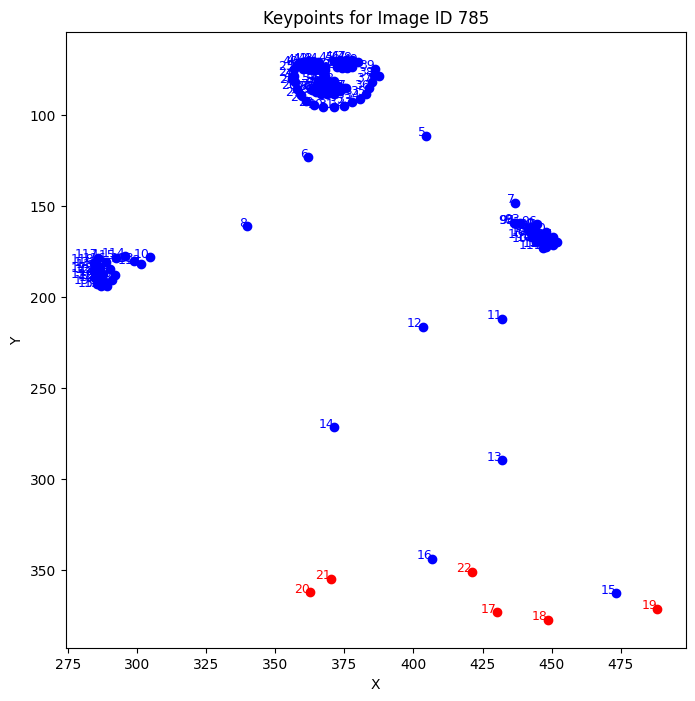

In [9]:
import json
import matplotlib.pyplot as plt

# Función para visualizar los keypoints con etiquetas y marcar ciertos puntos de otro color
def visualize_keypoints_with_labels(image_id, keypoints):
    plt.figure(figsize=(8, 8))
    for idx, (x, y) in enumerate(keypoints):
        if 17 <= idx <= 22:  # Marcar los puntos del ID 15 al 21 de otro color
            plt.scatter(x, y, c='r')
            plt.text(x, y, str(idx), fontsize=9, ha='right', color='red')
        else:
            plt.scatter(x, y, c='b')
            plt.text(x, y, str(idx), fontsize=9, ha='right', color='blue')

    plt.title(f'Keypoints for Image ID {image_id}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().invert_yaxis()  # Invertir el eje Y para coincidir con la imagen
    plt.show()

# Archivo JSON
input_file = './AlphaPose/examples/res_wholebody_val2017/alphapose-results.json'

# Leer el archivo JSON
with open(input_file, 'r') as f:
    data = json.load(f)

# Visualizar los keypoints para la primera imagen
first_image = data[2]
# Extraer todos los keypoints
keypoints = first_image['keypoints']
all_keypoints = []
for idx in range(0, len(keypoints), 3):
    all_keypoints.append((keypoints[idx], keypoints[idx+1]))  # Solo tomar x e y

# Visualizar todos los keypoints con etiquetas
visualize_keypoints_with_labels(first_image['image_id'], all_keypoints)